In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

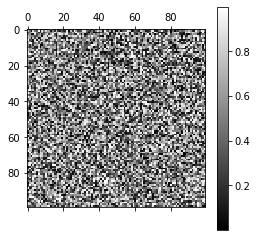

In [117]:
plt.set_cmap('gray')
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

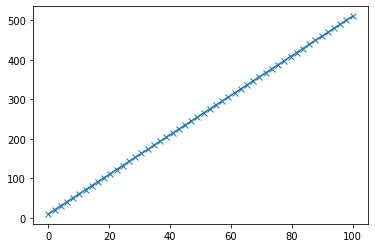

In [118]:
x = np.linspace(0, 100)
y = x * 5 + 10
plt.plot(x, y, '-x')

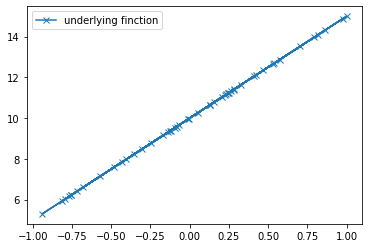

In [119]:
n = 50
d = 1


x = np.random.uniform(-1, 1, (n, d))
# x.shape
weight_true = np.array([[5]])
bias_true = np.array([10])

y_true = x @ weight_true + bias_true

plt.plot(x, y_true, marker = 'x', label = 'underlying finction')
plt.legend()

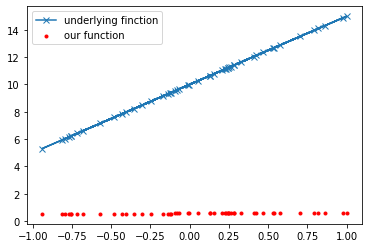

In [120]:
class Linear:
    def __init__(self, input_dim, num_hidden = 1):
        self.weights = np.random.rand(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias = np.random.rand(num_hidden)
        
        ## The __call__ method enables you to write classes where the instances behave like functions and can be called like a function.
        
    def __call__(self, x):
        return x @ self.weights + self.bias

linear = Linear(d) # it is an instance that is callable
y_pred = linear(x) # "linear" instance  called with x argument
plt.plot(x, y_true, marker = 'x', label = 'underlying finction')
plt.scatter(x, y_pred, color = 'r', marker = '.', label = 'our function')
plt.legend()

In [121]:
class MSE:
    
#     def __init__(self, y_pred, y_true):
#         self.y_pred = y_pred
#         self.y_true = y_true
        
    def __call__(self, y_pred, y_true):
        self.y_pred  = y_pred
        self.y_true = y_true
        return ((self.y_true - self.y_pred) **2).mean()
    
    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient
        

class Linear:
    
    def __init__(self, input_dim, num_hidden: int = 1):
        self.weights = np.random.rand(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(num_hidden)
    
    def __call__(self, x):
        self.x = x
        output = x @ self.weights + self.bias
        return output
    
    def backward(self, gradient):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum(axis = 0)
#         self.x_gradient = gradient @ self.weights.T
#         return self.x_gradient
    
    def update(self, lr):
        self.weights = self.weights - (lr * self.weights_gradient)
        self.bias = self.bias - (lr * self.bias_gradient)

In [112]:
epochs = 41
loss = MSE()
linear = Linear(d)

for i in range(epochs):

    y_pred = linear(x)
    loss_value = loss(y_pred, y_true)
    if i % 5 == 0:
        print(f' epoch: {i}, loss: {loss_value}')
    loss_gradient = loss.backward()
    linear.backward(loss_gradient)
    linear.update(0.2)

 epoch: 0, loss: 107.00983070349437
 epoch: 5, loss: 1.5773248433031497
 epoch: 10, loss: 0.22095866457192875
 epoch: 15, loss: 0.049212290544386014
 epoch: 20, loss: 0.011138086815546608
 epoch: 25, loss: 0.0025219381155399223
 epoch: 30, loss: 0.0005710356385114254
 epoch: 35, loss: 0.0001292980971067764
 epoch: 40, loss: 2.9276628151721023e-05
